## More data Processing with Pandas
- Reading assignments
    - Chapter eight: Data Wrangling: Join, Combine, Reshape
    - Chapter ten: Data Aggregation and group operations
    - Chapter twelve: Advanced pandas
- Merging DataFrames
- Pandas Idiom
- Group by
- Scales
- Pivot Table
- Date/Time functionality

En muchas aplicaciones, la data podria estar repartida en cierto numero de archivos o bases de datos que estan ordenadas en una forma que no es sencilla de analizar. Vamos a ver herramientas para combinar, hacer join y reordenar data. Primero, vamos a formalizar el concepto de indices gerarquicos

## Hierarchical Indexing

Es una herramienta importante de pandas que permite tener multiples _index levels_ en un eje. 

In [1]:
import pandas as pd
import numpy as np

# Creemos una serie con unas listas como indices

data = pd.Series(np.random.randn(9), 
                 index=[['a','a','a','b','b','c','c','d','d'],[1,2,3,1,3,1,2,2,3]])
data

a  1    0.268571
   2    0.583808
   3    0.658716
b  1   -0.774041
   3    2.228520
c  1   -0.129517
   2   -1.077272
d  2   -0.218526
   3   -0.214463
dtype: float64

In [2]:
# Nuesto view nos dice que tenemos MultiIndex como Index de nuestro dataframe. Los "gaps" nos indican que se usa 
# la etiqueta que esta arriba

data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [3]:
# Podemos llamar el subset de la data:
print(data['b'])

# o podemos llegar a un nivel "inner":

print(data.loc[:,2])

1   -0.408202
3    0.144993
dtype: float64
a   -0.944573
c   -0.692657
d   -1.484670
dtype: float64


In [4]:
# podriamos rearrange la data en un Dataframe usando el metodo unstack
data.unstack()

,1,2,3
a,-1.147007,-0.944573,2.594691
b,-0.408202,NaN,0.144993
c,1.648405,-0.692657,NaN
d,NaN,-1.484670,0.749671


In [5]:
# O la operacion inversa

data.unstack().stack()

a  1   -1.147007
   2   -0.944573
   3    2.594691
b  1   -0.408202
   3    0.144993
c  1    1.648405
   2   -0.692657
d  2   -1.484670
   3    0.749671
dtype: float64

In [2]:
# En un Dataframe tenemos que cualqueir axis puede tener un hiearchical index: 

frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                     ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

## Summary statistics by level

In [3]:
# Hay estadisticas descriptivas y resumenes de un DAtaFrame o serie que tienen una opcion de Level
# Por ejemplo, vemos que nuestro set de datos podria nombrarse segun la gerarquia de indices, demos un nombre:

frame.index.names = ['key1','key2']
frame.columns.names = ['state','color']

frame


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [4]:
# Ahora podeos aggregar algo segun un eje particular o un nivel.

frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [5]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## Combining and merging DataFrames
La data que contiene un objeto de pandas puede combinarse en numerosos caminos:
    * pandas.merge: conecta filas en un DataFrame basado en una o mas keys. Esto es familiar a usuarios de SQL o otras bases de datos relacionales con su implementacion de join operations
    * pandas.concat: concatena o "stacks" together objects along an axis
    * La instancia combine_first que permite splicing together overlapping data para llenar missing values en un objeto con valores de otro

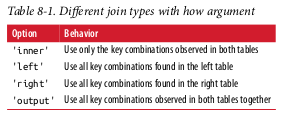

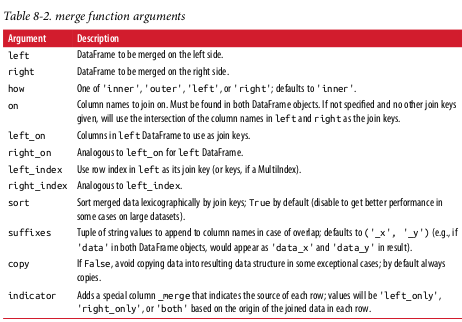

In [2]:
# Aqui estaremos usando las teorias de conjuntos que se conocen de los Diagramas de Venn.
# Este background se traducira utilizando Pandas. Hay que reconocer las distintas convenciones 
# como outer-full-join, inner-join, etc y su relacion con las uniones e intercepciones

import pandas as pd
# Primero creamos dos DataFrames, staff y students
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                          {'Name': 'Sally', 'Role': 'Course liasion'},
                          {'Name': 'James', 'Role': 'Grader'}])
# indexamos por nombre
staff_df = staff_df.set_index('Name')

# Creamos un DataFrame para los estudiantes
student_df = pd.DataFrame([{'Name':'James', 'School':'Business'},
                            {'Name':'Mike', 'School':'Law'},
                           {'Name': 'Sally','School': 'Engineering'}])
# Indexamos por nombre
student_df = student_df.set_index('Name')



# Imprimimos los df
print(staff_df)
print(student_df)



                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [3]:
# Aqui lo importante es notar que tenemos a Sally y James en ambos sets. Son estudiantes y Staff pero
# Mike y Kelly No.

In [4]:
# Si queremos hacer una union, llamamos merge() pasando el DataFrame en la izquierda y el DataFrame en la derecha.
# Le decimos a merge() que queremos un outer join y que queremos que use los indices de la izquierda y la derecha
# como las joining columns

pd.merge(staff_df,student_df,how='outer', left_index = True, right_index = True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [5]:
# Aqui se hizo una union de todo. Ambos conjuntos se encuentran. Vemos que Mike no tiene un Role, y Kelly no tiene
# una School y se listan estas celdas como missing values

# Si queremos una interseccion, solamente los estudiantes Y staff, usamos el atributo inner. 
# De nuevo, seleccionamos el indice de la izquierda y de la derecha como True para que sean las joining columns

pd.merge(staff_df,student_df, how= 'inner', left_index= True, right_index = True)


,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [6]:
# Podemos hacer set addition. Por ejemplo, queremos una lista de todo el staff, sin importar que sean estudiantes
# o no. Pero, si son estudiantes, queremos que se muestren esos detalles. Para esto vemos que merge respeta
# el orden en el que le pasamos los DataFrames. En este caso, usamos left join

pd.merge(staff_df,student_df,how='left',left_index=True,right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [7]:
# Este es nuestro Staff. Pero vemos que Sally y James, que son tambien estudiantes, muestran su escuela

# Hagamos esto para el conjunto de estudiantes. Esta vez usamos un right join y nos mostrara los estudiantes
# Sin importar que sean staff. Y cuando son staff, nos mostrara los detalles

pd.merge(staff_df,student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [8]:
# Hay otro parametros de merge que son interesantes. Por ejemplo, no necesitas hacer el join con los indices,
# puedes hacerlo usando las columnas. Puedes usar join on. 

# Por ejemplo, queremos usar on y una columna que este en ambos DataFrames para hacer el joining

#Removeremos los indices de ambos DataFrames
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

# Ahora hacemos merge usando el parametro on
pd.merge(staff_df,student_df, how = 'right', on = 'Name')

,Name,Role,School
0,Sally,Course liasion,Engineering
1,James,Grader,Business
2,Mike,NaN,Law


In [9]:
# Usando el parametro "on" en lugar del indice es la forma más comun de encontrar los merges

In [11]:
# Que ocurre cuando hay conflicto entre DataFrames?. 

staff_df= pd.DataFrame([{'Name':'Kelly', 'Role':'Director of HR', 'Location':'State Street'},
                        {'Name':'Sally', 'Role':'Course liasion','Location':'Washington Avenue'},
                        {'Name':'James', 'Role':'Grader','Location': 'Washington Avenue'}])

student_df = pd.DataFrame([{'Name':'James','School':'Business','Location':'1024 Billiard Avenue'},
                           {'Name':'Mike','School':'Law','Location':'Fraternity House #22'},
                           {'Name':'Sally','School':'Engineering','Location':'512 Wilson Crescent'}])

# En el staff DataFrame tenemos la direccion de la oficina donde podemos encontrar al staff. En el
# DataFrame de estudiantes tenemos su direccion personal. 

# La funcion merge preserva esta informacion pero añade un _x or _y para ayudar a diferenciar entre
# cual indice con cual columna de datos. El _x siempre se refiere a la informacion del DataFrame de la izquierda
# mientras que el _y siempre se refiere a la informacion del DataFrame de la derecha

# Si queremos la informacion del staff, sin importar si son estudiantes o no, pero, si son estudiantes nos gustaria
# tener sus detalles, podemos usar el left join en la columna de nombre

pd.merge(staff_df,student_df, how= 'left', on='Name')


,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [12]:
# Aqui vemos las columas Location_x y Location_y. La columna Location_x se refiere a la informacion del 
# left DataFrame, en este caso, contiene la direccion del staff.

# Que pasa cuando tenmos overlaping? Por ejemplo, un DataFrame que tenga el nombre y el apellido donde hayan
# personas con el mismo nombre pero distinto apellido? Si hacemos on Name va a haber overlaping 
# En este caso, usamos una lista de multiples columnas que deberian ser usadas como join keys de ambos DataFrames


staff_df= pd.DataFrame([{'First Name':'Kelly', 'Last Name': 'Desjardins', 'Role':'Director of HR'},
                        {'First Name':'Sally', 'Last Name':'Brooks','Role':'Course liasion'},
                        {'First Name':'James', 'Last Name':'Wilde', 'Role':'Grader'}])

student_df = pd.DataFrame([{'First Name':'James', 'Last Name':'Hammond','School':'Business'},
                           {'First Name':'Mike','Last Name':'Smith','School':'Law'},
                           {'First Name':'Sally','Last Name':'Brooks','School':'Engineering'}])

# James Wilde y James Hammond no coinciden en ambas keys debido a que tienen distintos apellidos
# Por lo que podriamos esperar que un inner join no incluya a ambos. Pero a Sally si

pd.merge(staff_df,student_df, how= 'inner', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


In [1]:
# Hacer joining es muy comun y necesitamos saber como cargar data de distintas fuentes, limpiarlas y unirlas

# Si pensamos en merging as joining "horizontally", significa que unimos valores similares en una columna
# que encontramos en dos DataFrames. Por otro lado, al concatenar podemos hacer un joining "vertically", que sería
# poner DataFrames en el tope y en el  bottom uno de otro.

# Por ejemplo, si uno tuviera un dataset que registra informacion a lo largo de los años, por ejemplo,
# cada año sería un archivo csv separado y cada csv de cada año tiene exactamente las mismas columnas.
# Si quisieramos poder toda esta data junta, con los registros de todos los años, entonces hariamos una 
# concatenación.

In [2]:
## FALTA MINUTO 13. SE CARGA UNA DATABASE DE COLLEGE_SCORECARD QUE NO TENGO


Ahora sabemos como hacer merge y concatenar datasets. Veremos esto muy util para combinar data y tener resultados mas complejos o complicados para analizar. Saber como hacer merge es muy importante si se procura limpiar y manipular data. Es bueno saber como unir (join) diferentes datasets rapidamente. Las diferentes opciones cuando se unen datasets. Se recomienda revisar la documentacion

### Pandas Idioms

Los programadores sugieren que hay muchos camnos que pueden ser usados para resolver un problema en particular. Pero algunos de estos son mas apropiados que otros. La mejor solución se celebra como Idiomatic Python y hay un monton de ejemplos de estos en StackOverflow y otros sitios webs

Pandas tiene su propios sets de idioms. Ya hemos mencionado algunos de ellos, como usar vectorization cuando sea posible y evitar usar los interactive loops si no son necesarios. Hay un termino para estos idioms: __Pandorable__. Aqui veremos algunas features para hacer el codigo más pandorable

In [3]:
# Importamos nuestras librerias de procesamiento
import pandas as pd
import numpy as np

# Traeremos algunas funcionalidades de timing del modulo timeit
import timeit

#Veamos nuestro dataset de census
df = pd.read_csv('resources/week-3/datasets/census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [10]:
# El primer Pandas Idioms será el llamado method chaining. La idea general detras del method chaining
# es que cada metodo de un objeto retorna una referencia de ese objeto. La belleza de esto es que
# tu puedes condensar muchas operaciones en un DataFrame, por ejemplo, en una linea o en un mismo statement de codigo

# Aqui el pandorable way para escribir codigo con method chaining. En este codigo vamos a sacar
# el estado y el city name como multiple index, y sera solo con data que tenga el Summary level 50, que 
# en este dataset sV'e refiere al county-level data. Renombraremos tambien las columnas para hacerlo mas legible

(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns = {'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [11]:
# Aqui primero usamos where() en el dataframe y le pasamos una mascara booleana que solo sera cierta
# para aquellos valores donde SUMLEV == 50. Esto nos dice que nuestra data estara resumida al county-level
# Con este resultado (de where()), hacemos un drop de los missing values con dropna() debido a que where
# no hace drop de los missing values por defecto. Luego, hacemos un set index con ese resultado con el State Name
# seguido del County Name. Finalmente, renombramos una columna para hacerlo mas regible.
# Todo esto pudo escribirse en solo una linea. Sin embargo, el statement se inicio con un parenthesis, lo cual
# es una forma de decirle a python que dividiremos el statement en varias lineas para su legibilidad.

In [12]:
# Aqui hay una forma menos pandorable de hacer la misma operacion. Esta bien, en un sentido funcional
# y seguramente alguien que sea nuevo en el lenguaje lo entendera mejor. Es solamente que no es tan pandorable
# como el primer ejemplo

#Entonces creemos un DataFrame a partir del original.
df = df[df['SUMLEV']==50] #Aqui estamos usando el operador de indexacion sobrecargado (overloaded indexing operator [])
                          # Este operador si hace drop de los nans automaticamente
# Actualizamos el DataFrame para que tenga un nuevo indice, reeplazamos el inplace = True para hacerlo in place
df.set_index(['STNAME','CTYNAME'], inplace = True)
# Los nombres de las columnas
df.rename(columns={'ESTIMATESBASE2010':'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [13]:
# La clave aqui es entender cuando, cualquier idiom, realmente no te está ayudando. En este caso
# podriamos hacer n time de ambos metodos y ver cual corre mas rapido

# Podemos poner las aproximaciones en una funcion y pasamos esas funciones dentro del timeit para contar
# el tiempo que tarda. El parametro de number nos permite elegir cuantas veces queremos que se corra la funcion
# En este caso haremos que corra 10 veces


# Escribamos nuestra funcion
def first_approach():
    global df
    #Pegamos nuestro codigo aqui
    return (df.where(df['SUMLEV']==50)
                .dropna()
                .set_index(['STNAME','CTYNAME'])
                .rename(columns = {'ESTIMATESBASE2010': 'Estimates Base 2010'}))

# Leemos el dataset como nuevo
df = pd.read_csv('resources/week-3/datasets/census.csv')

# y medimos el tiempo de corrida
timeit.timeit(first_approach,number=10)


1.0534496229956858

In [20]:
# Ahora vamos a probar la segunda aproximacion. Estamos usando una variable global en la funcion.
# Sin embargo, cada cambio que hagamos a nuestra variable global dentro de la funcion va a modificar la variable
# incluso en el global scope y no queremos que eso ocurra en este caso. Por lo tanto, crearemos un nuevo dataframe
# para los registros

def second_approach():
    global df
    new_df = df[df['SUMLEV']==50]
    new_df.set_index(['STNAME','CTYNAME'], inplace= True)
    return new_df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

# Leemos nuestro dataset anew
df = pd.read_csv('resources/week-3/datasets/census.csv')
# Corremos y leemos el tiempo

timeit.timeit(second_approach,number=10)
    

0.25640055799885886

In [15]:
# Como podemos ver aqui, parece que la segunda aproximacion es mas rapida. Este es un ejemplo particular de 
# classic time readability trade of

# Veremos un monton de ejemplos en stackoverflow y en la documentacion de personas usando chaining en sus pandas
# Ser capaz de leer y entender la sintaxis es realmente algo que vale el tiempo. Sin embargo, hay que tener en mente
# que seguir algo que parezca stylistic idioms quiza traiga problemas de rendimientos que se necesitan considerar
# tambien

In [16]:
# Aqui va otro ejemplo de pandas idioms. Python tiene una funcion maravillosa llamada map, que es base
# de la programacion funcional en el lenguaje. Cuando queremos usar la funcion map de python, pasamos una funcion
# y algo iterable, como una lista, a la que queremos aplicar la funcion. El resultado sera que la funcion será 
# llamada con cada item de la lista y el resltado sera una lista con todas las evaluaciones de la funcion


# Pandas tiene tambien una funcion llamada applymap. En applymap, das una funcion que quieres que opere
# en cada celda del DataFrame y luego retorne un DataFrame. Esto se usa raras veces. Sin por otro lado, 
# quieres hacer un map a lo largo de todas las filas del DataFrame, pandas tiene apply

In [22]:
# Vemos que nuestro dataset tenemos 5 columnas de population stimates.
# donde cada columna corresponde a un año de estimacion. Por lo tanto, es un poco razonable que queramos
# crear una nueva columna para los valores minimos y maximos. Para esto, la funcion apply es un modo facil de hacerlo

#Primero, necesitamos escribir una funcion que tome una particular fila de data, encuentre el minimo y el maximo
# y retorne una nueva fila de data. Llamaremos esta funcion min_max. 

# Podemos crear una pequeña porcion de una fila, proyectando las columas de la poblacion, luego podemos usar 
# las funciones min y max de numpy para crear una nueva serie con los valores de etiqueta que representan el nuevo
# valor 

def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    
    return pd.Series({'min':np.min(data), 'max':np.max(data)})

# Ahora solo necesitamos llamar apply en el DataFrame.

#Apply tomara la funcion y el eje en el cual queremos operar como parametros. Tenemos que tener cuidado
# porque habiamos estado hablando del axis 0 como las filas. Pero, este parametro es realmente el parametro
# del indice a usar. Para usar apply a lo largo de todas las filas, que se esta aplicando a todas las columnas,
# debemos enviar axis == 'columns'

df.apply(min_max,axis='columns').head()

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861


In [23]:
# Asi como aqui retornamos una nueva Series Object, podriamos querer añadir el valor a un DataFrame ya existente
# Por ejemplo, para querer hacer summary or descriptive statistics (lo cual se usa mucho al hacer merging dataframes)

In [26]:
# Hagamos de nuevo min y max pero retornando series separadas para mostrar el min y el max añadiendo dos nuevas
# columnas al original dataframe

def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    # Creamos nueva entrada para max
    row['max'] = np.max(data)
    # Creamos nueva entrada para min
    row['min'] = np.min(data)
    
    return row

# Usamos apply al dataFrame
df.apply(min_max,axis='columns')

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,57776,57373
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961,10887,10606
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868,20944,20154
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406,118437,115620
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901,34153,33993


In [27]:
# Apply es una herramienta extremadamente importante en nuestro toolkit. Sin embargo, rara vez la veremos
# usandose en definiciones de funciones largas, como nosotros lo hicimos. Por lo general, se usa en lambdas

# Para muchas de las discusiones que hay online, necesitamos saber como leer lambdas. 
# Se puede imaginar como podria encadenar varias llamadas de apply con lambdas juntas para crear un script
# de manipulacion de datos. Un ejemplo de una linea de como podemos calcular el maximo usando apply function seria:

rows = ['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014',
        'POPESTIMATE2015']
# Ahora haremos un apply a traves del DataFrame con lambda

df.apply(lambda x: np.max(x[rows]), axis=1).head() #Aqui tambien podriamos decir que axis = columnas

0    4858979
1      55347
2     203709
3      27341
4      22861
dtype: int64

In [28]:
# Recordemos que una funcion lambda es solo una funcion sin nombre. En este caso, toma un single parameter
# y retorna un single value, en este caso, el maximo aplicado a todas las columnas asociadas con row x

In [29]:
# apply permite mucha flexibilidad en hacer cualquier manipulacion que se desee
# ya que la funcion que se le pasa a apply puede modificarse como uno quiera. 
# Intentemos ahora dividir las categorias en Northeast, Midwest, South, West. y una funcion que retorne
# la region basada en el estado. La state regions information se obtiene de wikipedia

def get_state_region(x):
    northeast = ['Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island',
                 'Vermont','New York','New Jersey','Pennsylvania']
    midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas','Minnesota',
               'Missouri','Nebraska','North Dakota','South Dakota']
    south= ['Delaware','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia',
            'District of Columbia','West Virginia','Alabama','Kentucky','Mississippi','Tennessee',' Arkansas', 
            'Lousiana','Oklahoma','Texas']
    west = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming','Alaska',
            'California','Hawaii','Oregon','Washington']
    
    if x in northeast:
        return "Norteast"
    if x in midwest:
        return "MidWest"
    if x in south:
        return 'South'
    else:
        return "West"

In [30]:
# Ahora que tenemos nuestra funcion customizada, diremos que queremos crear una nueva columna llamada Region
# que muestre el state's regions. Nuestra funcion se supone que trabaja sobre la columna STNAME por lo que usaremos
# apply en el nombre de la columna y pasaremos la funcion 

df['state_region'] = df['STNAME'].apply(lambda x: get_state_region(x))

In [31]:
# Aqui apply le pasara un lambda. Lambda solo tomara cualqueir valor que vea ahi y lo enviara a nuestra funcion
# customizada

# Veamos los resultados
df[['STNAME','state_region']].head()

,STNAME,state_region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


Si revisas las preguntas mejor clasificadas sobre pandas en StackOverflow, podras ver como los autores mas experimentados responden. Hay un patron??. Es una forma de aprender sobre los pandas idioms

## Data Aggregation and Group Operations

Categorizar dataset y aplicar funciones a cada grupo, teniendo un aggregation or transformation, es un componente critico en el data analysis workflow. Una de las razones para la popularidad de las bases de datos relacionales (y SQL) es lo sencillo que la data puede ser joined, filtered, transformed y aggregated. Veremos como pandas y las expresiones de Python permiten hacer operaciones de grupos complejas utilizando cualqueir funcion que acepte un objeto de pandas o un arreglo de numpy.

## GroupBy Mechanics: 

El termino split-apply-combine se ha atribuido para describir group operations. En la primera etapa del proceso, la data contenida en un objeto de pandas (como series o dataframes) es split en grupos basados en una o mas keys. El splitting se hace en un particular eje de un objeto, por ejemplo, un Dataframe puede ser agrupado en sus rows (axis=0) o en sus columns (axis=1). Una vez hecho esto, una funcion es applied a cada grupo, produciendo un nuevo valor. Finalmente, el resultado de la aplicacion de las funciones se combina en un objeto resultante.

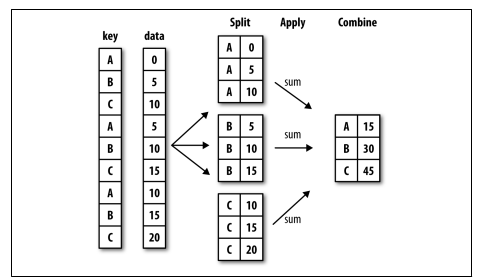

In [6]:
# Para empezar, partamos de un pequeño ejemplo de un dataset tabular como DataFrame

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                    'key2' : ['one', 'two', 'one', 'two', 'one'],
                    'data1' : np.random.randn(5),
                    'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.322771,-0.028906
1,a,two,1.081080,1.471842
2,b,one,-0.753585,-0.809979
3,b,two,0.502781,0.904826
4,a,one,0.352354,-0.141741


In [7]:
# Supongamos que queremos computar el mean de data1 usando las etiquetas de key1. Aqui hay un numero 
# de caminos para hacer esto

grouped = df['data1'].groupby(df['key1'])
grouped

In [8]:
# Esto ahora es un GroupBy object. Esto realmente no ha computado nada. La idea es que este objeto contenga
# toda la informacion necesaria para aplicar alguna operacion a cada grupo. Por ejemplo, para computar group mean
# podemos llamar el GroupBy's mean method:


grouped.mean()

key1
a    0.036888
b   -0.125402
Name: data1, dtype: float64

In [10]:
# Aqui lo importante es entender que se ha agregado la Serie de acuerdo a una group key, produciendo una nueva
# serie que ahoar es indexada por los unique values en la columna key1. El result index tiene le nombre "key1"
# porque el DataFrame column df['key1'] lo tiene.


# Podemos tambien pasar multiple arrays como lista: 

means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.485209
      two     1.081080
b     one    -0.753585
      two     0.502781
Name: data1, dtype: float64

In [12]:
# Podemos pasar nombres de columnas como group keys:

df.groupby('key1').mean()

,data1,data2
key1,,
a,0.036888,0.433731
b,-0.125402,0.047424


In [13]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one  -0.485209 -0.085324
     two   1.081080  1.471842
b    one  -0.753585 -0.809979
     two   0.502781  0.904826

In [14]:
# Vemos que aqui, en nuestro primer caso, no se muestra key2 en el resultado. Esto es porque df['key2'] no es
# numeric data. es una nuisance column que sera luego excluida del resultado
# Por defecto, todas las numeric columns son aggregated.

### Group By

Algunas veces vamos a querer seleccionar data basada en grupos y entender como agregar data en un group-level. Hemos visto que pandas permite iterar sobre cada fila en el DataFrame, esto es generalmente leto para hacer. Afortunadamente, Pandas tiene groupby() function para acelerarlo.

La idea detras de groupby() es que esto toma un Dataframe, lo divide (split) en trozos basados en alguna keyvalue, aplica computation en esos trozos y luego combina los resultados y los pone juntos en otro Dataframe. A esto se le refiere como split-apply-combine pattern

### Splitting

In [2]:
# Vamos a ver un ejemplo. 
import pandas as pd
import numpy as np

In [10]:
# Ahora vamos a ver nuestro US census dataset

df = pd.read_csv('resources/week-3/datasets/census.csv')
# excluimos el state-level summarization que tiene sum level de 40
df = df[df['SUMLEV']==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [3]:
# En el primer ejemplo de groupby() vamos a usar census date.
# Primero tengamos una lista de los estados unicos en la cal podamos iterar a lo largo de los estados
# Por cada estado podemos reducir el Dataframe y calcular el average

# correremos esta tarea 3 veces y tomaremos el tiempo con la cell magic function %%timeit

In [4]:
%%timeit -n 3 

for state in df['STNAME'].unique():
    # Calcularemos el average usando numpy para este estado en particular
    avg= np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state' + state + 'have an average population of ' + str(avg))

Counties in stateAlabamahave an average population of 71339.34328358209
Counties in stateAlaskahave an average population of 24490.724137931036
Counties in stateArizonahave an average population of 426134.4666666667
Counties in stateArkansashave an average population of 38878.90666666667
Counties in stateCaliforniahave an average population of 642309.5862068966
Counties in stateColoradohave an average population of 78581.1875
Counties in stateConnecticuthave an average population of 446762.125
Counties in stateDelawarehave an average population of 299311.3333333333
Counties in stateDistrict of Columbiahave an average population of 601723.0
Counties in stateFloridahave an average population of 280616.5671641791
Counties in stateGeorgiahave an average population of 60928.63522012578
Counties in stateHawaiihave an average population of 272060.2
Counties in stateIdahohave an average population of 35626.86363636364
Counties in stateIllinoishave an average population of 125790.50980392157
Co

Counties in stateIdahohave an average population of 35626.86363636364
Counties in stateIllinoishave an average population of 125790.50980392157
Counties in stateIndianahave an average population of 70476.10869565218
Counties in stateIowahave an average population of 30771.262626262625
Counties in stateKansashave an average population of 27172.55238095238
Counties in stateKentuckyhave an average population of 36161.39166666667
Counties in stateLouisianahave an average population of 70833.9375
Counties in stateMainehave an average population of 83022.5625
Counties in stateMarylandhave an average population of 240564.66666666666
Counties in stateMassachusettshave an average population of 467687.78571428574
Counties in stateMichiganhave an average population of 119080.0
Counties in stateMinnesotahave an average population of 60964.65517241379
Counties in stateMississippihave an average population of 36186.54878048781
Counties in stateMissourihave an average population of 52077.62608695652


Counties in stateMontanahave an average population of 17668.125
Counties in stateNebraskahave an average population of 19638.075268817203
Counties in stateNevadahave an average population of 158855.9411764706
Counties in stateNew Hampshirehave an average population of 131647.0
Counties in stateNew Jerseyhave an average population of 418661.61904761905
Counties in stateNew Mexicohave an average population of 62399.36363636364
Counties in stateNew Yorkhave an average population of 312550.03225806454
Counties in stateNorth Carolinahave an average population of 95354.83
Counties in stateNorth Dakotahave an average population of 12690.396226415094
Counties in stateOhiohave an average population of 131096.63636363635
Counties in stateOklahomahave an average population of 48718.844155844155
Counties in stateOregonhave an average population of 106418.72222222222
Counties in statePennsylvaniahave an average population of 189587.74626865672
Counties in stateRhode Islandhave an average population

Counties in stateRhode Islandhave an average population of 210513.4
Counties in stateSouth Carolinahave an average population of 100551.39130434782
Counties in stateSouth Dakotahave an average population of 12336.060606060606
Counties in stateTennesseehave an average population of 66801.1052631579
Counties in stateTexashave an average population of 98998.27165354331
Counties in stateUtahhave an average population of 95306.37931034483
Counties in stateVermonthave an average population of 44695.78571428572
Counties in stateVirginiahave an average population of 60111.29323308271
Counties in stateWashingtonhave an average population of 172424.10256410256
Counties in stateWest Virginiahave an average population of 33690.8
Counties in stateWisconsinhave an average population of 78985.91666666667
Counties in stateWyominghave an average population of 24505.478260869564
Counties in stateAlabamahave an average population of 71339.34328358209
Counties in stateAlaskahave an average population of 2

Counties in stateAlaskahave an average population of 24490.724137931036
Counties in stateArizonahave an average population of 426134.4666666667
Counties in stateArkansashave an average population of 38878.90666666667
Counties in stateCaliforniahave an average population of 642309.5862068966
Counties in stateColoradohave an average population of 78581.1875
Counties in stateConnecticuthave an average population of 446762.125
Counties in stateDelawarehave an average population of 299311.3333333333
Counties in stateDistrict of Columbiahave an average population of 601723.0
Counties in stateFloridahave an average population of 280616.5671641791
Counties in stateGeorgiahave an average population of 60928.63522012578
Counties in stateHawaiihave an average population of 272060.2
Counties in stateIdahohave an average population of 35626.86363636364
Counties in stateIllinoishave an average population of 125790.50980392157
Counties in stateIndianahave an average population of 70476.10869565218
Co

Counties in stateIowahave an average population of 30771.262626262625
Counties in stateKansashave an average population of 27172.55238095238
Counties in stateKentuckyhave an average population of 36161.39166666667
Counties in stateLouisianahave an average population of 70833.9375
Counties in stateMainehave an average population of 83022.5625
Counties in stateMarylandhave an average population of 240564.66666666666
Counties in stateMassachusettshave an average population of 467687.78571428574
Counties in stateMichiganhave an average population of 119080.0
Counties in stateMinnesotahave an average population of 60964.65517241379
Counties in stateMississippihave an average population of 36186.54878048781
Counties in stateMissourihave an average population of 52077.62608695652
Counties in stateMontanahave an average population of 17668.125
Counties in stateNebraskahave an average population of 19638.075268817203
Counties in stateNevadahave an average population of 158855.9411764706
Countie

Counties in stateNew Hampshirehave an average population of 131647.0
Counties in stateNew Jerseyhave an average population of 418661.61904761905
Counties in stateNew Mexicohave an average population of 62399.36363636364
Counties in stateNew Yorkhave an average population of 312550.03225806454
Counties in stateNorth Carolinahave an average population of 95354.83
Counties in stateNorth Dakotahave an average population of 12690.396226415094
Counties in stateOhiohave an average population of 131096.63636363635
Counties in stateOklahomahave an average population of 48718.844155844155
Counties in stateOregonhave an average population of 106418.72222222222
Counties in statePennsylvaniahave an average population of 189587.74626865672
Counties in stateRhode Islandhave an average population of 210513.4
Counties in stateSouth Carolinahave an average population of 100551.39130434782
Counties in stateSouth Dakotahave an average population of 12336.060606060606
Counties in stateTennesseehave an aver

Counties in stateTexashave an average population of 98998.27165354331
Counties in stateUtahhave an average population of 95306.37931034483
Counties in stateVermonthave an average population of 44695.78571428572
Counties in stateVirginiahave an average population of 60111.29323308271
Counties in stateWashingtonhave an average population of 172424.10256410256
Counties in stateWest Virginiahave an average population of 33690.8
Counties in stateWisconsinhave an average population of 78985.91666666667
Counties in stateWyominghave an average population of 24505.478260869564
Counties in stateAlabamahave an average population of 71339.34328358209
Counties in stateAlaskahave an average population of 24490.724137931036
Counties in stateArizonahave an average population of 426134.4666666667
Counties in stateArkansashave an average population of 38878.90666666667
Counties in stateCaliforniahave an average population of 642309.5862068966
Counties in stateColoradohave an average population of 78581.

Counties in stateConnecticuthave an average population of 446762.125
Counties in stateDelawarehave an average population of 299311.3333333333
Counties in stateDistrict of Columbiahave an average population of 601723.0
Counties in stateFloridahave an average population of 280616.5671641791
Counties in stateGeorgiahave an average population of 60928.63522012578
Counties in stateHawaiihave an average population of 272060.2
Counties in stateIdahohave an average population of 35626.86363636364
Counties in stateIllinoishave an average population of 125790.50980392157
Counties in stateIndianahave an average population of 70476.10869565218
Counties in stateIowahave an average population of 30771.262626262625
Counties in stateKansashave an average population of 27172.55238095238
Counties in stateKentuckyhave an average population of 36161.39166666667
Counties in stateLouisianahave an average population of 70833.9375
Counties in stateMainehave an average population of 83022.5625
Counties in stat

Counties in stateMarylandhave an average population of 240564.66666666666
Counties in stateMassachusettshave an average population of 467687.78571428574
Counties in stateMichiganhave an average population of 119080.0
Counties in stateMinnesotahave an average population of 60964.65517241379
Counties in stateMississippihave an average population of 36186.54878048781
Counties in stateMissourihave an average population of 52077.62608695652
Counties in stateMontanahave an average population of 17668.125
Counties in stateNebraskahave an average population of 19638.075268817203
Counties in stateNevadahave an average population of 158855.9411764706
Counties in stateNew Hampshirehave an average population of 131647.0
Counties in stateNew Jerseyhave an average population of 418661.61904761905
Counties in stateNew Mexicohave an average population of 62399.36363636364
Counties in stateNew Yorkhave an average population of 312550.03225806454
Counties in stateNorth Carolinahave an average population

In [5]:
# Ahora provemos con otro approach usando groupby. Ya vimso que esto toma bastante tiempo en hacerse

In [6]:
%%timeit -n 3
# Para este metodo, iniciamos diciendole a pandas que estamos interesados en grouping by state name. este es
# el "split"
for group,frame in df.groupby('STNAME'):
    # Aqui notamos que hay dos valores. groupby retorna una tupla donde el primer valor es el value key
    # con el que estamos tratando de agrupar, en este caso, un specific state name, y el segundo es 
    # el projected dataframe que se encontro para ese grupo
    
    # Aqui usaremos la logica de nuestro paso de "apply" donde calculamos el avg del census2010pop
    avg = np.average(frame['CENSUS2010POP'])
    # Solo proyectamos en el frame la columna que nos interesa, no hay que hacer mas reducciones aqui porque sabemos
    # que todo esta dado para un mismo estado
    
    # imprimimos el resultado
    print('Counties in state ' + group + ' have a population of ' + str(avg))

Counties in state Alabama have a population of 71339.34328358209
Counties in state Alaska have a population of 24490.724137931036
Counties in state Arizona have a population of 426134.4666666667
Counties in state Arkansas have a population of 38878.90666666667
Counties in state California have a population of 642309.5862068966
Counties in state Colorado have a population of 78581.1875
Counties in state Connecticut have a population of 446762.125
Counties in state Delaware have a population of 299311.3333333333
Counties in state District of Columbia have a population of 601723.0
Counties in state Florida have a population of 280616.5671641791
Counties in state Georgia have a population of 60928.63522012578
Counties in state Hawaii have a population of 272060.2
Counties in state Idaho have a population of 35626.86363636364
Counties in state Illinois have a population of 125790.50980392157
Counties in state Indiana have a population of 70476.10869565218
Counties in state Iowa have a popul

Counties in state New York have a population of 312550.03225806454
Counties in state North Carolina have a population of 95354.83
Counties in state North Dakota have a population of 12690.396226415094
Counties in state Ohio have a population of 131096.63636363635
Counties in state Oklahoma have a population of 48718.844155844155
Counties in state Oregon have a population of 106418.72222222222
Counties in state Pennsylvania have a population of 189587.74626865672
Counties in state Rhode Island have a population of 210513.4
Counties in state South Carolina have a population of 100551.39130434782
Counties in state South Dakota have a population of 12336.060606060606
Counties in state Tennessee have a population of 66801.1052631579
Counties in state Texas have a population of 98998.27165354331
Counties in state Utah have a population of 95306.37931034483
Counties in state Vermont have a population of 44695.78571428572
Counties in state Virginia have a population of 60111.29323308271
Counti

Counties in state Indiana have a population of 70476.10869565218
Counties in state Iowa have a population of 30771.262626262625
Counties in state Kansas have a population of 27172.55238095238
Counties in state Kentucky have a population of 36161.39166666667
Counties in state Louisiana have a population of 70833.9375
Counties in state Maine have a population of 83022.5625
Counties in state Maryland have a population of 240564.66666666666
Counties in state Massachusetts have a population of 467687.78571428574
Counties in state Michigan have a population of 119080.0
Counties in state Minnesota have a population of 60964.65517241379
Counties in state Mississippi have a population of 36186.54878048781
Counties in state Missouri have a population of 52077.62608695652
Counties in state Montana have a population of 17668.125
Counties in state Nebraska have a population of 19638.075268817203
Counties in state Nevada have a population of 158855.9411764706
Counties in state New Hampshire have a p

Counties in state Alabama have a population of 71339.34328358209
Counties in state Alaska have a population of 24490.724137931036
Counties in state Arizona have a population of 426134.4666666667
Counties in state Arkansas have a population of 38878.90666666667
Counties in state California have a population of 642309.5862068966
Counties in state Colorado have a population of 78581.1875
Counties in state Connecticut have a population of 446762.125
Counties in state Delaware have a population of 299311.3333333333
Counties in state District of Columbia have a population of 601723.0
Counties in state Florida have a population of 280616.5671641791
Counties in state Georgia have a population of 60928.63522012578
Counties in state Hawaii have a population of 272060.2
Counties in state Idaho have a population of 35626.86363636364
Counties in state Illinois have a population of 125790.50980392157
Counties in state Indiana have a population of 70476.10869565218
Counties in state Iowa have a popul

Counties in state Utah have a population of 95306.37931034483
Counties in state Vermont have a population of 44695.78571428572
Counties in state Virginia have a population of 60111.29323308271
Counties in state Washington have a population of 172424.10256410256
Counties in state West Virginia have a population of 33690.8
Counties in state Wisconsin have a population of 78985.91666666667
Counties in state Wyoming have a population of 24505.478260869564
Counties in state Alabama have a population of 71339.34328358209
Counties in state Alaska have a population of 24490.724137931036
Counties in state Arizona have a population of 426134.4666666667
Counties in state Arkansas have a population of 38878.90666666667
Counties in state California have a population of 642309.5862068966
Counties in state Colorado have a population of 78581.1875
Counties in state Connecticut have a population of 446762.125
Counties in state Delaware have a population of 299311.3333333333
Counties in state District o

Counties in state Alabama have a population of 71339.34328358209
Counties in state Alaska have a population of 24490.724137931036
Counties in state Arizona have a population of 426134.4666666667
Counties in state Arkansas have a population of 38878.90666666667
Counties in state California have a population of 642309.5862068966
Counties in state Colorado have a population of 78581.1875
Counties in state Connecticut have a population of 446762.125
Counties in state Delaware have a population of 299311.3333333333
Counties in state District of Columbia have a population of 601723.0
Counties in state Florida have a population of 280616.5671641791
Counties in state Georgia have a population of 60928.63522012578
Counties in state Hawaii have a population of 272060.2
Counties in state Idaho have a population of 35626.86363636364
Counties in state Illinois have a population of 125790.50980392157
Counties in state Indiana have a population of 70476.10869565218
Counties in state Iowa have a popul

Counties in state Alabama have a population of 71339.34328358209
Counties in state Alaska have a population of 24490.724137931036
Counties in state Arizona have a population of 426134.4666666667
Counties in state Arkansas have a population of 38878.90666666667
Counties in state California have a population of 642309.5862068966
Counties in state Colorado have a population of 78581.1875
Counties in state Connecticut have a population of 446762.125
Counties in state Delaware have a population of 299311.3333333333
Counties in state District of Columbia have a population of 601723.0
Counties in state Florida have a population of 280616.5671641791
Counties in state Georgia have a population of 60928.63522012578
Counties in state Hawaii have a population of 272060.2
Counties in state Idaho have a population of 35626.86363636364
Counties in state Illinois have a population of 125790.50980392157
Counties in state Indiana have a population of 70476.10869565218
Counties in state Iowa have a popul

In [7]:
# Vemos que hay una gran diferencia en velocidad

In [1]:
# Ahora, 99% del tiempo se usara group by en una o mas columnas. Pero tambien se puede proveer una funcion
# para usar group by en un propio segmento de data.

# Este es un ejemplo fabricado. Podriamos crear una funcion que retorne un valor 0,1 o 2 dependiendo de la primera
# letra del state name. Luego le diremos agroup by que use esta funcion para hacer split up de nuestro dataframe
# Es importante notar aqui el index del DataFrame debe ser la columna que queremos agrupar primero

# crearemos una funcion llamada batch_number y si su primera letra es una M mayuscul retornara 0,Q retornara 1
# y otro caso retornara 2

## Iterating over groups

El Groupby objetct soporta iteracion, generando una secuencia de 2-tuples que contiene el group name along with the chunk of data.

In [16]:
# Podemos elegir que hacer con nuestros trozos de data. Podria ser util combinar un dict de las data pieces:

pieces=dict(list(df.groupby('key1')))

pieces['b']

,key1,key2,data1,data2
2,b,one,-0.753585,-0.809979
3,b,two,0.502781,0.904826


In [11]:
df = df.set_index('STNAME')


def set_batch_number(item):
    if item[0] < 'M':
        return 0
    if item[0] < 'Q':
        return 1
    return 2


# The dataframe is supposed to be gropud by according to the batch number. Haremos un loop a traves de cada
# batch group

for group, frame in df.groupby(set_batch_number):
    print('There are ' + str(len(frame)) +' record in group ' + str(group) + ' for processing')

There are 1177 record in group 0 for processing
There are 1134 record in group 1 for processing
There are 831 record in group 2 for processing


In [12]:
# Notamos que en esta vez no se paso una column name a groupby(). Se puso como index del dataFrame
# que sea STNAME y si no se pasa una columna a groupby() automaticamente se usara el index

In [13]:
# Otro ejemplo de como debemos agrupar data. Usaremos un dataset de housing de Airbnb. En este Dataset hay dos 
# columnas de interes, cancellation_policy y review_scores value

df = pd.read_csv('resources/week-3/datasets/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [14]:
# Ahora, como podemos agrupar por ambas columnas? Un primer acercaiento seria usar multiindex y llamar groupby

df = df.set_index(['cancellation_policy','review_scores_value'])

# Cuando tenemos multiindex necesitamos pasar los niveles en los que estamos interesados en grouping by
for group,frame in df.groupby(level=(0,1)):
    print(group)

('flexible', 2.0)
('flexible', 4.0)
('flexible', 5.0)
('flexible', 6.0)
('flexible', 7.0)
('flexible', 8.0)
('flexible', 9.0)
('flexible', 10.0)
('moderate', 2.0)
('moderate', 4.0)
('moderate', 6.0)
('moderate', 7.0)
('moderate', 8.0)
('moderate', 9.0)
('moderate', 10.0)
('strict', 2.0)
('strict', 3.0)
('strict', 4.0)
('strict', 5.0)
('strict', 6.0)
('strict', 7.0)
('strict', 8.0)
('strict', 9.0)
('strict', 10.0)
('super_strict_30', 6.0)
('super_strict_30', 7.0)
('super_strict_30', 8.0)
('super_strict_30', 9.0)
('super_strict_30', 10.0)


In [16]:
# Esto parece funcionar. Si queremos agrupar por cancellation plicy y review scores, pero separados los 10s 
# de los < 10s ? En este caso usaremos una funcion para manejar los grouping

def grouping_fun(item):
    # Revisamos el review_scores_value portion of the index. Item esta en formato (cancellation_policy, review_value)
    # por lo que tendremos que mirar el orden de los  elementos de la tupla
    if item[1] == 10.0:
        return (item[0],'10.0')
    else:
        return (item[0],'Not 10.0')
    
for group, frame in df.groupby(by=grouping_fun):
    print(group)

('flexible', '10.0')
('flexible', 'Not 10.0')
('moderate', '10.0')
('moderate', 'Not 10.0')
('strict', '10.0')
('strict', 'Not 10.0')
('super_strict_30', '10.0')
('super_strict_30', 'Not 10.0')


In [17]:
df.head()

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   

                                                                                   summary  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one block...   

                                                                                     space  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  The house has an open and cozy feel at the sam...   
                    9.0                  Small but cozy and quite room with a full size...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Most places you find in Boston are small howev...   
flexible            10.0                 Clean, attractive, private room, one block fro...   

                                                                               description  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one 

In [18]:
# En este punto, hemos aplicado procesamientos simples luego de hacer splitting a nuestra data. Solamente hacer print
# para demostrar como funciona el splitting. Aqui tenemos otras categorias de procesamiento que ocurren durante
# un apply step: Aggregation of group data, Transformation of group data y Filtration of group data

### Aggregation

Aggregation se refiere a cualquier data tranformation que produce valores escalares de arreglos.  Estas son algunas common aggregation que tienen implementaciones optimizadas. Sin embargo, esto no esta limitado a este set de metodos: 

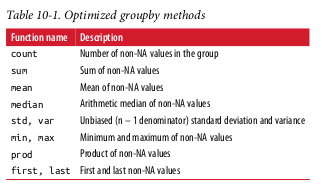

In [19]:
# Aggregation usa el metodo agg() en groupby objects. Hasta ahora vimos como podemos iterar sobre un 
# groupby object, desempaquetarlo en etiquetas (el group name) y en dataframes. Con agg podemos pasar un diccionario
# de las columnas en las que estamos interesados en aggregar along with the function we are looking to apply aggregate

# vamos a resetear nuestro df

df = df.reset_index()

# Ahora group by cancellation policy and find the average review_scores_value by group

df.groupby('cancellation_policy').agg({'review_scores_value':np.average})
# al objeto grupby que se devuelve le aplicamos agg y le damos un diccionario con el column name
# Sin embargo, en versiones nrecientes de python, .agg() en un groupby es deprecated por lo que tendremos
# que pasar una custom function para obtener efectos similares

,review_scores_value
cancellation_policy,
flexible,NaN
moderate,NaN
strict,NaN
super_strict_30,NaN


In [20]:
# Parece que no funcionó. Solo nos dio not a numbers. Lo que ocurre aqui es en la funcion que enviamos a aggregate
# porque np.average no ignora los nans. Sin embargo, podemos usar otra funcion
df.groupby('cancellation_policy').agg({'review_scores_value':np.nanmean})

,review_scores_value
cancellation_policy,
flexible,9.237421
moderate,9.307398
strict,9.081441
super_strict_30,8.537313


In [21]:
# Podemos extender nuestro diccionario para agregar multiples funciones o multiples columnas
df.groupby('cancellation_policy').agg({'review_scores_value':(np.nanmean,np.nanstd),
                                       'reviews_per_month':np.nanmean})

review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.095409          1.829210
moderate                       9.307398  0.859311          2.391922
strict                         9.081441  1.040123          1.873467
super_strict_30                8.537313  0.834487          0.340143

In [22]:
# Aqui primero hicimos un groupby en el dataframe object por la columna 'cancellation_policy'. Esto retorna
# un objeto groupby al que le aplicamos la funcion agg con un diccionario que contiene los nombres de columnas
# y las operaciones que queremos realizar. Agg esta retornando un single row per dataframe/group 
# Notemos que las funciones que estamoss usando en el diccionario no son invicaciones; no son np.nanmean().
# Estas son referencias a funciones que deberian retornar un single value. Groupby reconoce esa tupla de funciones
# y llama cada funcion en orden en la misma columna. El resultado va a ser heirarchical index, pero como son columnas
# no tienen un index per se. Luego de esta tupla indicamos otra columna con otra single function a ejecutar.

### Transformation

In [23]:
# Transformation is different from aggregation. Mientras que agg() retorna un single value per column, esto es
# una fila por grupo, transform() retorna un objeto que tiene el mismo tamaño que el grupo.
# Essentially, es un broadcasts a la funcion sobre el grouped dataframe, retornando un nuevo dataframe.
# This makes combining data later easy

In [24]:
# Supongamos que queremos incluir el average ratng values en un group determinado by cancellation policy
# pero preservando la forma del dataframe (dataframe shape), asi podriamos generar la diferencia entre
# observaciones individuales y la suma.

# Primero, definimos som subset of columns 
cols = ['cancellation_policy','review_scores_value']
# Ahora transformamos. Guardaremos esto en su propio dataframe
transform_df = df[cols].groupby('cancellation_policy').transform(np.nanmean)
transform_df.head()

,review_scores_value
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


In [25]:
df.head()

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,review_scores_communication,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,10.0,9.0,f,NaN,NaN,t,f,f,1,1.30
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,10.0,9.0,f,NaN,NaN,f,t,f,1,0.47
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,10.0,10.0,f,NaN,NaN,f,f,f,1,1.00
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,10.0,9.0,f,NaN,NaN,f,f,f,1,2.25


In [26]:
# Aqui vemos que el index es realmente el mismo que en el dataframe original. Vamos a hacer join.
# Antes de hacer esto, renombremos la columna en la version transformada

transform_df.rename({'review_scores_value':'mean_review_scores'}, axis='columns', inplace= True)
df=df.merge(transform_df, left_index = True, right_index = True) #Hacemos un merge por los indices porque son los mismos
df.head()

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,NaN,f,NaN,NaN,f,f,f,1,NaN,9.307398
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,9.0,f,NaN,NaN,t,f,f,1,1.30,9.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,9.0,f,NaN,NaN,f,t,f,1,0.47,9.307398
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,10.0,f,NaN,NaN,f,f,f,1,1.00,9.307398
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,9.0,f,NaN,NaN,f,f,f,1,2.25,9.237421


In [27]:
# Perfecto. Ya tenmos nuestra columna con el promedio. Ahora podriamos crear la diferencia entre una row and 
# it's group (the cancellation policy) means

df['mean_diff'] = np.absolute(df['review_scores_value'] - df['mean_review_scores']) # Aqui estamos vectorizando
                                                                # Y pasando los nombres de las columnas para una resta
    
df['mean_diff'].head()

0         NaN
1    0.307398
2    0.692602
3    0.692602
4    0.762579
Name: mean_diff, dtype: float64

### Filtering

In [28]:
# El GroupBy object has build in support for filtering groups. Tambien es compatible con filtrado.
# A menudo se querra agrupar por algunas caracteristicas, luego realizar algunas transformaciones en los grupos
# y, a continuacion, eliminar ciertos grupos como parte de la rutina de limpieza (cleaning routines)
# filter() toma una funcion que se aplica a cada group dataframe y retorna True or False dependiendo de si ese
# grupo debe incluirse en el resultado

In [29]:
# Por ejemplo, si solo quisieramos aquellos grupos que tengan un mean rating sobre 9
df.groupby('cancellation_policy').filter(lambda x: np.nanmean(x['review_scores_value'])>9.2)

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,f,NaN,NaN,f,f,f,1,NaN,9.307398,NaN
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,f,NaN,NaN,t,f,f,1,1.30,9.307398,0.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,f,NaN,NaN,f,t,f,1,0.47,9.307398,0.692602
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,f,NaN,NaN,f,f,f,1,1.00,9.307398,0.692602
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,f,NaN,NaN,f,f,f,1,2.25,9.237421,0.762579
5,flexible,10.0,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,...,f,NaN,NaN,f,f,f,1,1.70,9.237421,0.762579
7,moderate,10.0,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",...,f,NaN,NaN,f,t,t,2,2.38,9.307398,0.692602
8,moderate,10.0,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,...,f,NaN,NaN,f,f,f,1,5.36,9.307398,0.692602
10,flexible,10.0,12023024,https://www.airbnb.com/rooms/12023024,20160906204935,2016-09-07,Cozy room in a well located house,The room is in a single family house located i...,NaN,The room is in a single family house located i...,...,f,NaN,NaN,f,f,f,1,0.36,9.237421,0.762579
11,flexible,9.0,1668313,https://www.airbnb.com/rooms/1668313,20160906204935,2016-09-07,Room in Rozzie-Twin Bed-Full Bath,Quiet second floor bedroom sleeps one in comfo...,NaN,Quiet second floor bedroom sleeps one in comfo...,...,f,NaN,NaN,f,f,f,2,0.48,9.237421,0.237421


In [31]:
# Notamos que los resultados estan aun indexed, pero cualquier resultado que estuviera en un grupo con mean
# review scores menor o igual a 9.2 no esta copiado aqui

### Applying

In [36]:
# De lejos, la operacion mas comun en group objects seria apply(). Esto permite que 
# apliques funciones arbitrarias a cada grupo y luego poner los resultados de nuevo juntos para cada apply
# en un dataframe donde se conserva el indice

# Veamos un ejemplo con nuestro airbnb dataset. Generemos una copia limpia del dataframeç
df= pd.read_csv('resources/week-3/datasets/listings.csv')
# y vamos a incluir algunas columas que nos interesen
df=df[['cancellation_policy','review_scores_value']]
df.head()

,cancellation_policy,review_scores_value
0,moderate,NaN
1,moderate,9.0
2,moderate,10.0
3,moderate,10.0
4,flexible,10.0


In [37]:
# En ejercicios anteriores, queriamos encontrar el average review score de una lista y su desviacion del grupo 
# (listing and its desviation from the group mean), Estos son dos pasos del proceso. Primero, usamos transform()
# en el groupby object y luego un broadcast para crear una nueva columna. Con apply() podemos agrupar esta logica
# en un solo lugar

def calc_mean_review_scores(group):
    # group is a dataframe just of whatever we have grouped by, e.g. cancellation policy, asi que lo trataremos
    # como un dataframe completo
    
    avg = np.nanmean(group['review_scores_value'])
    # Ahora broadcast our formula y crear una nueva columna
    group['review_scores_mean'] = np.abs(avg-group['review_scores_value'])
    return group

# Ahora aplicamos esto a los grupos

df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()

,cancellation_policy,review_scores_value,review_scores_mean
0,moderate,NaN,NaN
1,moderate,9.0,0.307398
2,moderate,10.0,0.692602
3,moderate,10.0,0.692602
4,flexible,10.0,0.762579


In [38]:
# Usar apply puede ser mas lento que usar algunas funciones especializadas, especialmente agg(). Pero,
# si el dataframe no es grande, este es un solid general purpose approach

Groupby es una poderosa y comun herramienta para el data cleaning y el data analysis. Una vez que agrupas tu data por alguna categoria de tu dataframe o solo aquellos valores que queires agregarles un analisis en los segmentos en los que estas interesado. The groupby() function sigue un split-apply-combine approach. Primero, la data se divide en grupos, luego uedes aplicar alguna transformacion, filtrado o aggregation, luego los resultados se combinan automaticamente en pandas para nosotros

## Scales

In [40]:
# Importemos pandas normalmente
import pandas as pd

# Aqui hay un ejemplo, creemos un dataframe de notas en orden descendente. Podemos tambien poner un index
# value como "excelente" o "bueno"

df = pd.DataFrame(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D'], 
                  index=['excellent','excellent','excellent','good','good','good','ok','ok','ok','poor','poor'],
                  columns=['Grades'])
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [41]:
# Si revisamos el datatype de esta columna, veremos que es solo un objeto. Debido a que solo tenemos string values
df.dtypes

Grades    object
dtype: object

In [42]:
# Podemos, sin embargo, decirle a pandas que queremos cambiar el tipo a category, usando astype() function

df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [53]:
# Aqui vemos que ahora pandas sabe que hay 11 categorias. Mas interesante aun, esta data esta ahora ordenada
# Por ejemplo, ahora pandas sabe que un A+ es mayor que un B o que un A. Podeos decirle a pandas que nuestra data esta ordenada
# creando a new categorical data type con la lista de categorias (en orden) y el ordered=True flag

my_categories = pd.CategoricalDtype(categories=['D','D+','C-','C','C+','B-','B','B+','A-','A','A+'],
                                    ordered = True)
# Luego odemos pasar esto en la funcion astype()
grades = df['Grades'].astype(my_categories)
grades.head()

AttributeError: module 'pandas' has no attribute 'CategoricalDtype'

In [54]:
# Esto me esta dando un error. Hay que revisar. Con esto, pandas no solamente sabe que nuestras listas son categorias
# si no que sabe tambien el orden de las etiquetas.

In [55]:
df[df['Grades']>'C'] #Aqui vamos a consultar en nuestro df que no conoce el orden.

,Grades
ok,C+
ok,C-
poor,D+
poor,D


In [56]:
# Vemos que no sabe muy bien lo que hace pues D y C- no son notas mayores a C.
# Si probamos con nuestro df que conoce el orden de las etiquetas si podremos hacer consultas de este tipo

In [57]:
grades[grades>'C']

NameError: name 'grades' is not defined

In [58]:
# Algunas veces es util represantar categorical values donde cada una es una columa con True or False
# Esto es especialmente comun en extraction, lo cual es un topico en el data mining course. 
# Variables con boolean value tiicamente se llama dummy variables, y pandas tiene funciones build-in
# llamada get_dummies que convierte el valor en una single column en multiples columns de ceros y unos
# indicando la presencia de dummy variable. 


In [59]:
# Ahora hablaremos de convertir escalas. Por ejemplo, algo en interval or ratio scale, como numeric grade, en otra
# que sea categorical. Esto podria ser util si uno esta buscando la frecuencia de categorias, histogramas
# Al usar machine learning classification approach que requiere categorical data.
# Pandas tiene una funcion llamada cut que toca un argumento de un array-like structure como una oclumna de un
# dataframe o series y el numero de bins a ser usados. Estos bins are kept at equal spacing

# Veamos de nuevo nuestro dataset de census. Aqui vimos que podemos agrupar por estados, luego agregar
# una lista que tenga el average county size by state. Si aplicamos un cut a esto, digamos, en 10 bins,
# podremos ver los estaods listados como categoricals using the average counting size


import numpy as np

df = pd.read_csv('resources/week-3/datasets/census.csv')

#Reducimos a country data

df = df[df['SUMLEV'] == 50]

# Y para algunos grupos
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(np.average)

df.head()

STNAME
Alabama        71339.343284
Alaska         24490.724138
Arizona       426134.466667
Arkansas       38878.906667
California    642309.586207
Name: CENSUS2010POP, dtype: float64

In [60]:
# Ahora si queremos hacer bins de cada uno de estos, podemos usar cut

pd.cut(df,10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

In [61]:
# Aqui podemos ver que estados como Alaska y Alabama caen en la misma categoria, pero por ejemplo
# District of Columbia cae en una categoria diferente.

# Ahora, cutting es solo un camino para hacer categorias de tu data. Hay otros metodos. 
# Cut nos da un interval data, donde el espacio entre cada categoria es equal-sized. Pero algunas veces
# queremos formar categorias basadas en frecuencias, queremos que el numero de items de cada bin sea el mismo.
# Esto realmente depenede de la forma de nuestra data y lo que queramos hacer.

### Pivot Table

Una pivot table es un camino para resumir data en un DataFrame por un particular proposito. It makes heavy use of the aggregation functions. A pavit table is inself a DataFrame donde las filas representan una variable en la que estas interesado y otra en las columnas y las celdas aggregate value. 

Una pivot table tiene a incluir marginal values, que son la suma para cada columa y fila. Eso ayuda a ver las relaciones entre dos variables de un vistazo.



In [1]:
import pandas as pd
import numpy as np

In [6]:
# Cargaremos el dataset de Times Higher Education World University Ranking dataset, el cual es uno de las mas
# influyentes medidas de las Universidades. Vamos a importar el dataset y verlo

df = pd.read_csv('resources/week-3/datasets/cwurData.csv')
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [22]:
# Aqui vemos un ranking de las instituciones con country, quality of educations, other metrics, overall score
# Vamos a crear una nueva columna llamada RankLevel donde las instituciones sean:
# 1-100 first tier
# 101-200 second tier
# 201-300 third tier
# 301 other top universities

def create_category(ranking):
    if (ranking >= 1) & (ranking <= 100):
        return 'First Tier Top University'
    elif (ranking >= 101) & (ranking <= 200): 
        return 'Second Tier Top University'
    elif (ranking >= 201) & (ranking <= 300):
        return 'Third Tier Top University'
    return 'Other Top University'

# ahora podemos apply esto en una single ocolumn para crear una nueva serie
df['Rank_Level'] = df['world_rank'].apply(lambda x: create_category(x))
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,Rank_Level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top University
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top University
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top University
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,First Tier Top University
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,First Tier Top University


In [23]:
# Usemos pivot table. Vamos a comparar el rank level versus country of the universities y queremos comparar
# esto en terminos del overall score

# Para hacer esto, le decimos a pandas que queremos los values to be Score, index to be the country and
# the columns to be the rank levels. Luego especificamos una aggregation functions, donde usaremos la funcion mean()
# de numpy para calcular el promedio rating de universidades en ese pais

df.pivot_table(values='score', index='country',columns='Rank_Level', aggfunc=[np.mean]).head()

mean                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                 
Rank_Level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                     49.2425                 47.285000  
Austria                           NaN                 47.066667  
Belgium                       49.0840                 46.746667  
Brazil                        49.5650                       NaN

In [24]:
# Aqui vemos un hierarchical dataframe donde el index, o filas, son por paises y las columnas tienen
# dos niveles, el tp level que indica el mean value es usado como segundo nivel para nuestro rank.
# En este ejemplo solo tenemos una variable, the mean, entonces realmente no buscamos un indice gerarquico.

# Tambien hay alguns NaN values. Estos indican que, por ejemplo, Argentina solo tiene observaciones en la categoria
# Other top university

In [26]:
# Ahora, pivot tables no solo se limitan a una funcion que quieras aplicar. Puedes pasar named parameter,
# agg func. Que son una lista de funciones para aplicar y pandas te dara los resultados usando column names gerarquicos
# pasemos tambien max()

df.pivot_table(values='score', index='country', columns = 'Rank_Level', aggfunc=[np.mean,np.max]).head()
# Notemos que no estamos invocando funciones sino una referencia a las funciones de numpy

mean                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                 \
Rank_Level Second Tier Top University Third Tier Top University   
country                                                           
Argentina                         NaN                       NaN   
Australia                     49.2425                 47.285000   
Austria                           NaN                 47.066667   
Belgium                       49.0840                 46.746667   
Brazil                        49.5650                       NaN   

                                amax                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                 
Rank_Level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                       50.40                     47.47  
Austria                           NaN                     47.78  
Belgium                         49.73                     47.14  
Brazil                          49.82                       NaN

In [27]:
# Aqui vemos que tenemos a ambos, mean y max, en un nivel gerarquico. Tambien podemos resumir los valores en la
# top level column. Por ejemplo, si quisieramos ver el promedio general del pais para mean
# o quisieramos ver el max of max, podemos indicarle esto a pandas al darle un marginal value

df.pivot_table(values='score',index='country', columns = 'Rank_Level', aggfunc=[np.mean,np.max], 
               margins = True).head()

mean                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                            \
Rank_Level Second Tier Top University Third Tier Top University        All   
country                                                                      
Argentina                         NaN                       NaN  44.672857   
Australia                     49.2425                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                       49.0840                 46.746667  47.011000   
Brazil                        49.5650                       NaN  44.781111   

                                amax                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                        
Rank_Level Second Tier Top University Third Tier Top University    All  
country                                                                 
Argentina                         NaN                       NaN  45.66  
Australia                       50.40                     47.47  51.61  
Austria                           NaN                     47.78  47.78  
Belgium                         49.73                     47.14  52.03  
Brazil                          49.82                       NaN  49.82

In [37]:
# a pivot table es solo una multi-level Dataframe y podemos acceder a series o celdas en el DataFrame
# como hariamos en uno regular

# Creemos con neustro ejemplo anterior un nuevo dataframe

new_df = df.pivot_table(values='score',index='country', columns = 'Rank_Level', aggfunc=[np.mean,np.max], 
               margins = True)

# Ahora veamos el index

print(new_df.index)

# y las columnas
print(new_df.columns)

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'All'],
      dtype='object', name='country')
MultiIndex(levels=[['mean', 'amax'], ['First Tier Top University', 'Other Top University', 'Second Tier Top University', 'Third Tier Top University', 'All']],
           labels=[[0, 0

In [38]:
# Vemos que las columnas son gerarquicas. El top level column indica dos niveles: mean y max. 
# el lower level column indices tiene 4 categorias, que corresponten a nuestros 4 niveles de rank.
# Queremos consultar el average score de First Tier Top University en cada country. Para esto, tendriamos que hacer
# dos dataframes projections, el primero para mean y el segundo para el top tier

new_df['mean']['First Tier Top University'].head()

country
Argentina        NaN
Australia    47.9425
Austria          NaN
Belgium      51.8750
Brazil           NaN
Name: First Tier Top University, dtype: float64

In [30]:
# Vemos que obtenemos un objeto Serie. Como si fuera un DataFrame regular al que le estamos consultando por 
# una columna

type(new_df['mean']['First Tier Top University'])

pandas.core.series.Series

In [31]:
# Ahora quisieramos encontrar el pais que tiene el maximun average score en First Tier Top University level

new_df['mean']['First Tier Top University'].idxmax()

'United Kingdom'

In [39]:
# idxmax() es una funcion que no habiamos tratado. Se recomienda consultar la API para saber que cosas estan disponibles
# esta no es una funcion especial para pivot_tables, es una funcion built-in para Series objects


new_df.head()

mean                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                            \
Rank_Level Second Tier Top University Third Tier Top University        All   
country                                                                      
Argentina                         NaN                       NaN  44.672857   
Australia                     49.2425                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                       49.0840                 46.746667  47.011000   
Brazil                        49.5650                       NaN  44.781111   

                                amax                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                        
Rank_Level Second Tier Top University Third Tier Top University    All  
country                                                                 
Argentina                         NaN                       NaN  45.66  
Australia                       50.40                     47.47  51.61  
Austria                           NaN                     47.78  47.78  
Belgium                         49.73                     47.14  52.03  
Brazil                          49.82                       NaN  49.82

In [40]:
# Ahora vamos a intengar el stacking, este deberia mover las columnas mas bajas asi que los niveles
# de la clasificacion de la universidad a la fila mas interna. Veamos como se ve el stack y el unstack

new_df=new_df.stack()
new_df.head()

mean   amax
country   Rank_Level                                  
Argentina Other Top University        44.672857  45.66
          All                         44.672857  45.66
Australia First Tier Top University   47.942500  51.61
          Other Top University        44.645750  45.97
          Second Tier Top University  49.242500  50.40

In [34]:
new_df.unstack().head()

mean                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                            \
Rank_Level Second Tier Top University Third Tier Top University        All   
country                                                                      
Argentina                         NaN                       NaN  44.672857   
Australia                     49.2425                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                       49.0840                 46.746667  47.011000   
Brazil                        49.5650                       NaN  44.781111   

                                amax                       \
Rank_Level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                        
Rank_Level Second Tier Top University Third Tier Top University    All  
country                                                                 
Argentina                         NaN                       NaN  45.66  
Australia                       50.40                     47.47  51.61  
Austria                           NaN                     47.78  47.78  
Belgium                         49.73                     47.14  52.03  
Brazil                          49.82                       NaN  49.82

Esta fue una pequeña descripcion de las pivot tables, son increiblemente utiles cuando se trabaja con data numerica, especialmente si se intenta resumir la data de alguna forma. Regularmente se estaran creando new pivot tables on slices of data mientras exploras.

### Date/Time functionality

Dates y times son flexibles en pandas, permiten hacer analisis como time series analysis, del que hablaremos pronto. Pandas fue originalmente creado por Wed McKinney para manejar date and time data cuando trabajaba como consultor para hedge funds



In [41]:
import pandas as pd
import numpy as np

### Timestamp

In [42]:
# Pandas tiene cuatro principales clases time related. Timestamp, DatetimeIndex, Period, PeriodIndex.
# primero, vamos a ver Timestamp. Este representa un single timestamp y asocia el valor con puntos en el tiempo

# Por ejemplo, creemos un timestamp usando un string 9/1/2019 10:05AM. 

pd.Timestamp('9/1/2019 10:05AM')

Timestamp('2019-09-01 10:05:00')

In [44]:
# Tambien podemos crear un timestamp pasandole multiples parametros como year, month, date, hour

pd.Timestamp(2019,12,20,0,0)

Timestamp('2019-12-20 00:00:00')

In [45]:
# Timestamp tambien tiene atributos utiles, como isoweekday() que nos muestra el weekday del timestamp
# En esto 1 representa Monday y 7 representa Sunday

pd.Timestamp(2019,12,20,0,0).isoweekday()

5

In [47]:
# Tambien puedes extraer algo en particular, como un año, mes, dia especifico de un timestamp

pd.Timestamp(2019,12,20,5,2,23).second

23

### Period

In [48]:
# Supongamos que no estamos interesados en un punto especifico en el tiempo, sino que queremos un span of time
# Aqui es donde entra la clase period. Period representa un single time span, como un especifico dia o mes

# Creemos un period que es January 2016

pd.Period('1/2016')

Period('2016-01', 'M')

In [49]:
# Vemos que M es de Month, debido a que eso fue lo mas pequeño que proveemos a Period. Ahora un March 5th, 2016
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [50]:
# Vemos que ahora hace un granularity D for Day porque es lo mas pequeño que le pasamos. 

# Los Period objects representan el full timespan que se especifica. Es sencillo hacer aritmetica con periods, 
# Si queremos encontrar 5 meses despues de January 2016, simplemente sumamos 5

pd.Period('1/2016') + 5

Period('2016-06', 'M')

In [51]:
# Vemos que el resultado es June 2016. Si queremos encontrar 2 dias antes de March 5th 2016 será
#  simplemente restamos 2 

pd.Period('3/5/2016') - 2 

Period('2016-03-03', 'D')

In [52]:
# The key here is that the period object encapsulates the granularity for arithmetic

### DatetimeIndex and PeriodIndex

In [53]:
# The index of a timestamp is DatetimeIndex. Veamos un ejemplo, crearemos una serie t1 y usaremos Timestamp
# de Septiembre 1,2 y 3 del 2016. Cuando veamos la serie, cada timestamp sera el index y tendra un valor
# asociado

t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), 
                             pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [54]:
# Veremos el tipo del index. Es un DatetimeIndex
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [55]:
# Similarmente, podemos crear a period-based index.

t2 = pd.Series(list('def'),[pd.Period('2016-09'),pd.Period('2016-10'), 
                            pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [56]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime


In [58]:
# Veamos como convertir a Datetime. Supongamos que tenemos una lista de fechas y queremos crear un nuevo dataframe

# Vamos a crear una lista con muchos formatos. Esto es lo que usualmente tendriamos si tenemos
# formularios para introducir fechas o si tomamos fechas de distintos lugares

d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']

# y alguna data random

ts3 = pd.DataFrame(np.random.randint(10,100,(4,2)), index=d1, columns = list('ab'))
ts3

,a,b
2 June 2013,12,88
"Aug 29, 2014",63,45
2015-06-26,87,61
7/12/16,25,36


In [60]:
# Usaremos pandas to_datetime. Con esto pandas intentara convertir estos Datetime y ponerlos en un formato estandar

ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,12,88
2014-08-29,63,45
2015-06-26,87,61
2016-07-12,25,36


In [61]:
# to_datetime() tambien tiene la opcion de cambiar the date parse order. Por ejemplo, queremos pasar
# el argumento dayfirst = True para pasar la fecha en European date

pd.to_datetime('4.7.2012', dayfirst = True) # Capaz hay una ambiguedad en cual es el dia y cual es el mes

Timestamp('2012-07-04 00:00:00')

### Timedelta

In [62]:
# Timedeltas son diferencias en tiempo. No es lo mismo que un Period; pero si son conceptualmente similares. 
# Por ejemplo, si queremos tener la diferencia entre septiembre 3 y septiembre 1 tendremos un TimeDelta de dos dias

pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [63]:
# Tambien podemos hacer algo como encontrar que date and time is for 12 days y 3 horas despues de September 2nd
# at 8:10 Am

pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Offset

In [64]:
# Offset es similar a timedelta, pero este sigue unas especificas reglas de calendar duration. Offset
# permite la flexibilidad en terminos de tipos de intervalos de tiempo. Como hour, day, week, month, etc. Tambien
# tiene business day, end of month, semi month begin, etc

# Creemos un timestamp y vemos que dia es
pd.Timestamp('9/4/2016').weekday()

6

In [65]:
# Añadamos una semana
pd.Timestamp('9/4/2016') + pd.offsets.Week()

Timestamp('2016-09-11 00:00:00')

In [66]:
# Probemos the month end, que nos dira cual sera el ultimo dia de septiembre
pd.Timestamp('9/4/2016') + pd.offsets.MonthEnd()

Timestamp('2016-09-30 00:00:00')

### Working with Dates in a Dataframe

In [68]:
# Ahora veamos unos trucos para trabajar con dates en DataFrames. Supongamos que queremos 9 medidas
# tomadas bi-weekly, every sunday, empezando en October 2016. Usando date_range, podemos crear este 
# DatetimeIndex. En data_range, tenemos que especificar un inicio y un final. Si esto no es explicito, por defecto
# the date es considerada la start date. Luego tendremos que especificar el numero de periods y una frecuencia
# p.e 2W-SUN que queire decir biweekly on Sunday

dates = pd.date_range('10-01-2016', periods = 9, freq= '2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [69]:
# Aqui hay otras frecuencias que puedes especificar, por ejemplo, hacer business day
pd.date_range('10-01-2016',periods=9, freq='B')

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13'],
              dtype='datetime64[ns]', freq='B')

In [70]:
# o hacerlo quaterly, que el quarter inicia en Junio
pd.date_range('04-01-2016', periods=12, freq= 'QS-JUN')

DatetimeIndex(['2016-06-01', '2016-09-01', '2016-12-01', '2017-03-01',
               '2017-06-01', '2017-09-01', '2017-12-01', '2018-03-01',
               '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01'],
              dtype='datetime64[ns]', freq='QS-JUN')

In [72]:
# Volvamos a nuestro weekly on sunday y creemos un DataFrame usando estas fechas. y alguna random data

dates = pd.date_range('10-01-2016', periods = 9, freq= '2W-SUN')
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5,10,9).cumsum(),
                   'Count 2': 120 + np.random.randint(-5,10,9)}, index = dates)
df

,Count 1,Count 2
2016-10-02,106,123
2016-10-16,114,123
2016-10-30,110,127
2016-11-13,110,118
2016-11-27,112,120
2016-12-11,107,125
2016-12-25,104,117
2017-01-08,106,124
2017-01-22,103,115


In [73]:
# Aqui podemos revisar que dia es exactamente nuestras fechas. Por ejemplo, para verificar que son un Sunday

df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [74]:
# Tambien podemos usar diff() para ver la diferencia entre cada date's value
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,8.0,0.0
2016-10-30,-4.0,4.0
2016-11-13,0.0,-9.0
2016-11-27,2.0,2.0
2016-12-11,-5.0,5.0
2016-12-25,-3.0,-8.0
2017-01-08,2.0,7.0
2017-01-22,-3.0,-9.0


In [75]:
# Supongamos que queremos saber que es the mean count para cada mes en nuestro DataFrame. Podemos hacer esto
# usando resample. Converting desde la higher frequency from a lower frequency is called downsampling 

df.resample('M').mean()

,Count 1,Count 2
2016-10-31,110.0,124.333333
2016-11-30,111.0,119.000000
2016-12-31,105.5,121.000000
2017-01-31,104.5,119.500000


In [76]:
# Ahora hablemos del indexing y spacing. Por ejemplo, podriamos usar partial string indexing para encontrar valores 
# de un año en particular

df['2017']

,Count 1,Count 2
2017-01-08,106,124
2017-01-22,103,115


In [77]:
# O de un mes en particular
df['2016-12']

,Count 1,Count 2
2016-12-11,107,125
2016-12-25,104,117


In [78]:
# Incluso podemos cortar en un rango de fechas. Aqui solo querremos los valores from december 2016
# onwards
df['2016-12' : ]

,Count 1,Count 2
2016-12-11,107,125
2016-12-25,104,117
2017-01-08,106,124
2017-01-22,103,115


In [79]:
# Asi funciona la datefuncionality. PAndas con las fechas trabaja fenomenalmente y la documentacion
# describe esto con mas detalle